#**Servo Prediction using Linear Regression**

#**Objective of Servo Prediction using Linear Regression:**
The objective is to create an accurate linear regression model to predict the performance of a servo system based on various input parameters. Specific goals include:

Data Preparation: Collect, clean, and preprocess data on servo parameters and performance metrics.
Feature Selection: Identify and select the most relevant features impacting servo performance.
Model Development: Train and optimize a linear regression model to accurately predict servo performance.
Model Evaluation: Evaluate the model using metrics such as R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE).
Prediction and Analysis: Use the model to predict servo performance and provide insights for system optimization.
This model aims to assist in accurately forecasting servo behavior, enabling better system control and optimization.

#**Data Source for Servo Prediction using Linear Regression**
A commonly used dataset for servo prediction is the Servo dataset from the UCI Machine Learning Repository. This dataset contains records of servo system configurations and their corresponding performance measures.

Accessing the Dataset
UCI Machine Learning Repository: The Servo dataset can be found at the UCI Machine Learning Repository.
Link: 'https://github.com/YBIFoundation/Dataset/raw/main/Servo%20Mechanism.csv'
Details of the Servo Dataset
#**Attributes**:
motor: The type of motor (categorical variable with values A, B, C, D, E).
screw: The type of screw (categorical variable with values A, B, C, D, E).
pgain: Proportional gain setting (integer value between 3 and 6).
vgain: Velocity gain setting (integer value between 1 and 5).
class: The response variable (integer value between 0 and 7), representing the rise time.

In [1]:
import pandas as pd

In [ ]:
import numpy as np

In [11]:
df=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Servo%20Mechanism.csv')

In [12]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [15]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [16]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [17]:
df.shape

(167, 5)

In [20]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [21]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

In [22]:
y=df['Class']

In [23]:
y.shape

(167,)

In [24]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [25]:
X=df.drop(['Class'],axis=1)

In [26]:
X.shape

(167, 4)

In [27]:
X

,Motor,Screw,Pgain,Vgain
0,E,E,5,4
1,B,D,6,5
2,D,D,4,3
3,B,A,3,2
4,D,B,6,5
...,...,...,...,...
162,B,C,3,2
163,B,E,3,1
164,C,D,4,3
165,A,B,3,2


In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical variables
label_encoder = LabelEncoder()
df['Motor'] = label_encoder.fit_transform(df['Motor'])
df['Screw'] = label_encoder.fit_transform(df['Screw'])

# Define features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

In [32]:
from sklearn.linear_model import LinearRegression


In [45]:
lr=LinearRegression()

In [46]:
lr.fit(X_train,y_train)

LinearRegression()

In [47]:
y_pred=lr.predict(X_test)

In [48]:
y_pred

array([32.37085649,  4.83474777, 35.25754161, 29.15321684, 33.78535427,
       39.55872449, 17.54878682,  9.22153868, 15.7735634 , 34.8391264 ,
       14.66210171, 25.09738047, 35.14216248, 33.7276647 , 10.72349712,
       32.01013085, -3.82530757, 38.08653716, 39.50103493, 29.06575617,
       12.82918873, 19.35378135, 17.24575074, 20.07474629, 21.84996971,
       12.16591335, 21.60462319, 20.37778237, 22.26838492, 30.84097959,
       16.13428905, 20.79619758, 20.13243586, 38.14422672])

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [50]:
mean_absolute_error(y_test,y_pred)

6.943574779889394

In [51]:
mean_squared_error(y_test,y_pred)

65.85153026778555

In [52]:
r2_score(y_test,y_pred)

0.7191490505791938

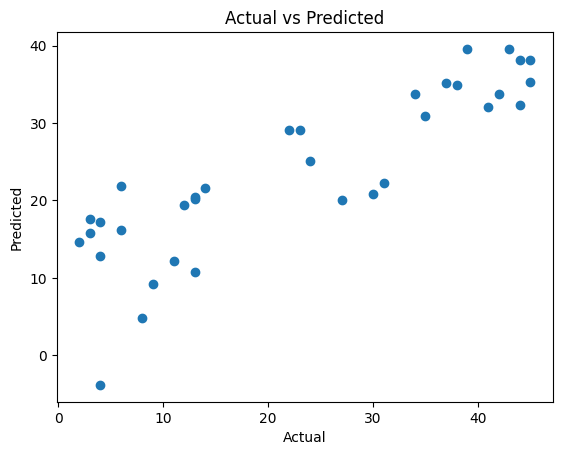

In [53]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

#**Get Feature Prediction**

let us select random sample from existing dataset as new value

In [54]:
x_new=df.sample(1)

In [55]:
x_new

,Motor,Screw,Pgain,Vgain,Class
76,4,2,4,1,4


In [56]:
x_new.shape

(1, 5)

In [57]:
x_new=x_new.drop(['Class'],axis=1)

In [58]:
x_new

,Motor,Screw,Pgain,Vgain
76,4,2,4,1


In [59]:
x_new.shape

(1, 4)

In [60]:
y_pred_new=lr.predict(x_new)

In [61]:
y_pred_new

array([12.82918873])

Certainly! Here's a concise explanation of each step in predicting servo performance using linear regression:

Load the Dataset: Obtain servo system data containing features like motor type, screw type, pgain, vgain, and the target variable representing servo performance (rise time).

Data Preprocessing: Convert categorical features (motor and screw) into numerical values using label encoding. Split the dataset into training and testing sets for model evaluation.

Train the Model: Develop a linear regression model using the training data to learn the relationships between input features and servo performance.

Evaluate the Model: Assess the model's predictive accuracy using metrics like Mean Absolute Error (MAE) and R-squared on the test set.

This approach helps in understanding and predicting how changes in servo parameters impact its performance, aiding in optimization and control of servo systems.